"""<br>
@Author: Prayag Bhoir<br>
@Date: 03-10-2024<br>
@Last Modified by: Prayag Bhoir<br>
@Last Modified time: 03-10-2024<br>
@Title : Python programs to Build a predictive linear regression model for  given temperature, humidity, wind speed , wind bearing, visibility, pressure  predict apparent temperature.  <br>
"""

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pylab as plt

<h2>Load the Dataset </h2>

In [67]:
df = pd.read_csv('weatherHistory.csv')
#check the data
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [68]:
# Filtered the data as we want
df_filtered = df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)','Apparent Temperature (C)']]
#check the data
df_filtered.head()


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,7.388889
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,7.227778
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,9.377778
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,5.944444
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,6.977778


In [69]:
df_filtered.shape

(96453, 7)

<h2>Check the outliers (Explore data)</h2>

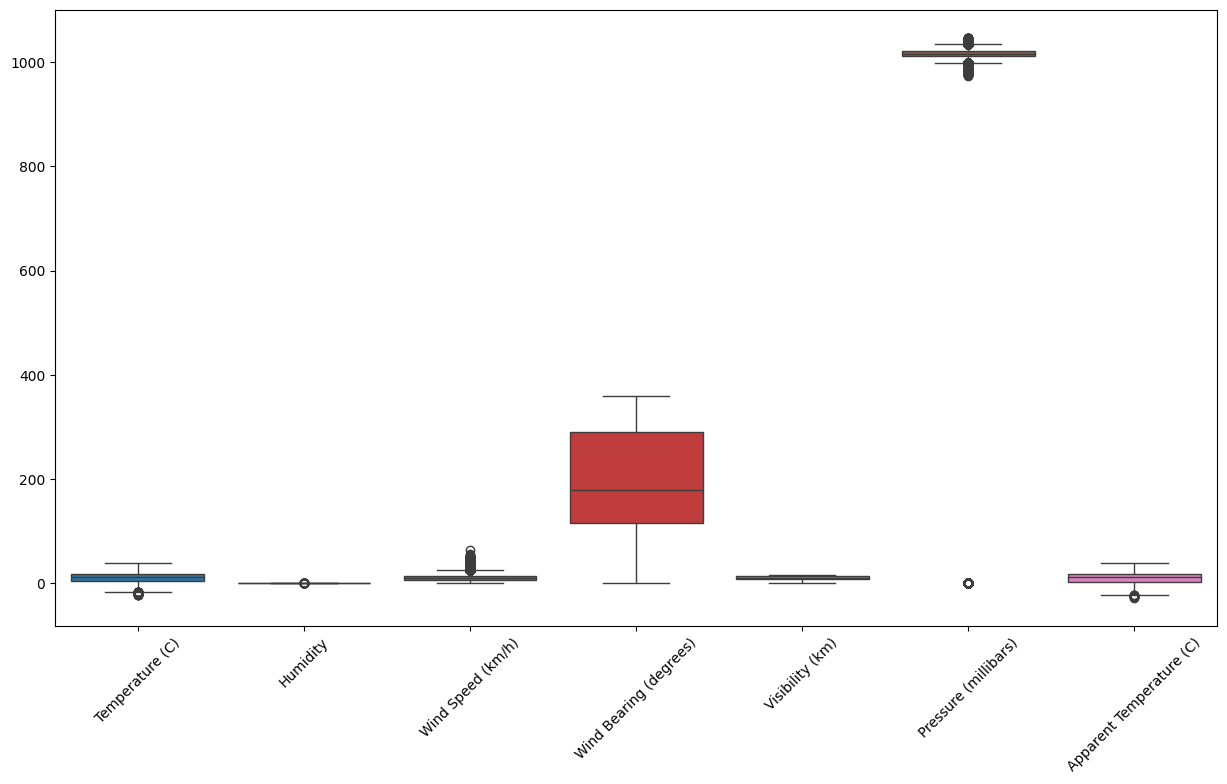

In [70]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_filtered)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

<h2>Observations</h2>
<li>There are outliers present in the features</li>

<h2>Preprocess the data</h2>

In [71]:
# Check for missing values in training and testing data
print("Missing values in data:")
print(df_filtered.isnull().sum())

Missing values in data:
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Apparent Temperature (C)    0
dtype: int64


In [72]:
# Remove the outliers
def remove_outliers_iqr(dataframe):
    """
    Description:
      This function removes the outliers using IQR

    Parameters:
      dataframe(pd.df): The dataframe to clean

    Returns:
      dataframe(pd.df): The dataframe after cleaning
    """
    # Define numerical columns to consider for outlier removal
    numerical_cols = dataframe.describe().columns
    
    for col in numerical_cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to remove outliers
        dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]
    
    return dataframe

# Remove outliers from the DataFrame
df_cleaned = remove_outliers_iqr(df_filtered)

In [73]:
# Run multiple times to further remove the outliers, but it can lead to data loss if you run to much times.
df_cleaned = remove_outliers_iqr(df_cleaned)

In [74]:
df_cleaned.shape

(88248, 7)

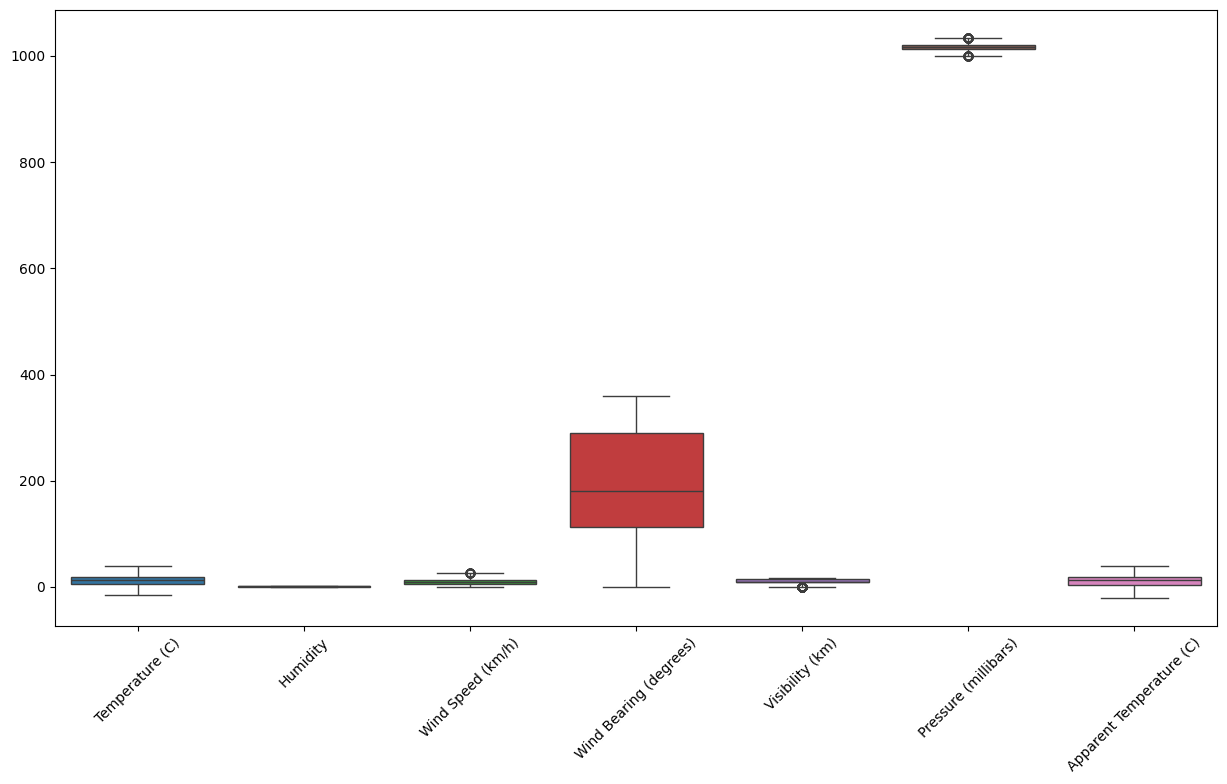

In [75]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

<h2>Saperate the features</h2>

In [76]:
X = df_cleaned[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']]
y = df_cleaned[['Apparent Temperature (C)']]
#Check the data
X.head(),y.head()

(   Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
 0         9.472222      0.89            14.1197                   251.0   
 1         9.355556      0.86            14.2646                   259.0   
 2         9.377778      0.89             3.9284                   204.0   
 3         8.288889      0.83            14.1036                   269.0   
 4         8.755556      0.83            11.0446                   259.0   
 
    Visibility (km)  Pressure (millibars)  
 0          15.8263               1015.13  
 1          15.8263               1015.63  
 2          14.9569               1015.94  
 3          15.8263               1016.41  
 4          15.8263               1016.51  ,
    Apparent Temperature (C)
 0                  7.388889
 1                  7.227778
 2                  9.377778
 3                  5.944444
 4                  6.977778)

<h2>Split the dataset into training and testing</h2>


In [77]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
display(X_test)
display(y_test)

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
65095,16.088889,0.78,12.8317,309.0,9.9820,1016.45
58780,13.938889,0.87,10.6421,137.0,15.1501,1010.45
7174,0.672222,0.96,20.5114,241.0,3.2844,1024.20
15472,2.800000,0.70,9.4346,249.0,9.9820,1014.46
43012,10.511111,0.80,17.2431,120.0,14.9086,1017.38
...,...,...,...,...,...,...
84741,11.666667,0.79,6.2790,161.0,16.1000,1015.48
77825,8.938889,0.99,3.9123,350.0,4.7495,1005.82
23726,23.566667,0.59,8.2593,349.0,11.2700,1010.25
32278,10.205556,0.76,6.6815,349.0,15.1501,1018.86


,Apparent Temperature (C)
65095,16.088889
58780,13.938889
7174,-4.444444
15472,0.183333
43012,10.511111
...,...
84741,11.666667
77825,8.938889
23726,23.566667
32278,10.205556


<h2>Build the model</h2>

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<h2>Make prediction on test data.</h2>

In [80]:
y_pred = model.predict(X_test)

<h2>Evaluating the model</h2>

In [81]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [82]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.9931724591623621
R-squared: 0.9910409801738379


<h2>Model Predictions</h2>

In [83]:
model.predict([[16.088889,	0.78,	12.8317,	309.0,	9.9820,	1016.45]])# 16.08

C:\Users\bhoir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[15.42985401]])